# Huấn luyện

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import keras
import cv2
import numpy as np
import os
import h5py
from matplotlib import pyplot as plt
import time
os.chdir('./drive/My Drive/GG_colab/CDTproject')

In [3]:
tf.__version__

'2.4.1'

In [4]:
with h5py.File("train_data_100_18-02.h5",'r') as F:
    x_train = np.array(F.get("x_train"))
    y_train = np.array(F.get("y_train"))
    x_test = np.array(F.get("x_test"))
    y_test = np.array(F.get("y_test"))

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(2689, 100, 100, 3) (2689, 6)
(350, 100, 100, 3) (350, 6)


In [5]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.12,shuffle = True)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)

(2366, 100, 100, 3) (2366, 6)
(323, 100, 100, 3) (323, 6)


In [6]:
count = np.zeros((6,),dtype=np.int16)
for i,label in enumerate(y_train):
  num = np.argmax(label)
  count[num] += 1
sumtrain = np.sum(count)
count = count/sumtrain
print(count)

[0.1682164  0.16737109 0.17075232 0.17582418 0.14623838 0.17159763]


In [7]:
countval = np.zeros((6,),dtype=np.int16)
for i,label in enumerate(y_val):
  num = np.argmax(label)
  countval[num] += 1
sumval = np.sum(countval)
countval = countval/sumval
print(countval)

[0.13312693 0.15789474 0.21671827 0.15479876 0.16718266 0.17027864]


In [8]:
counttest = np.zeros((6,),dtype=np.int16)
for i,label in enumerate(y_train):
  num = np.argmax(label)
  counttest[num] += 1
sumtest = np.sum(counttest)
counttest = counttest/sumtest
print(counttest)

[0.1682164  0.16737109 0.17075232 0.17582418 0.14623838 0.17159763]


## Pretrain model

In [ ]:
from keras.applications.resnet50 import ResNet50
base_model = ResNet50(weights='imagenet',include_top = False, input_shape = (100,100,3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [ ]:
#for layer in base_model.layers:
  #layer.trainable = False
x = base_model.output
x = keras.layers.GlobalAvgPool2D()(x)
x = keras.layers.Dropout(rate = 0.5)(x)
x = keras.layers.Dense(6,activation='softmax')(x)
model = keras.models.Model(base_model.input,x)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 50, 50, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

## Architecture 1 & 2

In [ ]:
def Tomato_model(input_shape):
  x_input = keras.layers.Input(input_shape)
  
  x = keras.layers.Conv2D(128,(5,5),padding = 'same')(x_input)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPool2D((2,2))(x)
  x = keras.layers.ReLU()(x)
  
  x = keras.layers.Conv2D(64,(5,5),padding = 'same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPool2D((2,2))(x)
  x = keras.layers.ReLU()(x)
  
  x = keras.layers.Conv2D(64,(3,3),padding = 'same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPool2D((2,2))(x)
  x = keras.layers.ReLU()(x)
  
  x = keras.layers.Conv2D(32,(3,3),padding = 'same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPool2D((2,2))(x)
  x = keras.layers.ReLU()(x)
  
  x = keras.layers.Flatten()(x)
  x = keras.layers.Dense(6,activation = 'softmax')(x)
  
  model = keras.models.Model(inputs = x_input, outputs = x)
  
  return model

In [ ]:
model = Tomato_model((100,100,3))
model.summary()

W0624 07:56:50.769881 140133674723200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0624 07:56:50.790379 140133674723200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 07:56:50.794633 140133674723200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0624 07:56:50.828991 140133674723200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0624 07:56:50.830459 1401336747

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 128)     9728      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 128)     512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
re_lu_1 (ReLU)               (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        204864    
_________________________________________________________________
batch_normalization_2 (Batch (None, 50, 50, 64)        256       
__________

## Architecture 3

In [9]:
def bottleneck_res_block(block_input,factor):
  ###expansion convolution layer
  x = keras.layers.Conv2D(int(factor)*int(block_input.shape[3]),(1,1))(block_input) 
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.ReLU(max_value = 6)(x)
  
  ###depthwise convolution layer
  x = keras.layers.DepthwiseConv2D((3,3),padding = 'same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.ReLU(max_value = 6)(x)
  
  ###projection convolution layer
  x = keras.layers.Conv2D(int(int(x.shape[3])/int(factor)),(1,1))(x)
  x = keras.layers.BatchNormalization()(x)
  #x = keras.layers.ReLU(max_value = 6)(x)
  
  #Residual connect
  x = keras.layers.Add()([x,block_input])
  x = keras.layers.Dropout(rate = 0.5)(x)
  
  return x

In [10]:
def Tomato_model(input_shape):
  x_input = keras.layers.Input(input_shape)
  
  x = keras.layers.Conv2D(32,(1,1),padding = 'same')(x_input)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.MaxPool2D((2,2))(x)
  x = keras.layers.ReLU(max_value = 6)(x)
  x = keras.layers.Dropout(rate = 0.2)(x)
  x = bottleneck_res_block(x,2)
  x = keras.layers.AveragePooling2D((2,2))(x)
  x = bottleneck_res_block(x,2)
  x = keras.layers.GlobalAveragePooling2D()(x)
  x = keras.layers.Dense(6,activation = 'softmax')(x)
  
  model = keras.models.Model(inputs = x_input, outputs = x)
  
  return model

In [11]:
model = Tomato_model((100,100,3))
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 100, 32) 128         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 100, 100, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 50, 50, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

## Train

In [ ]:
from keras.models import load_model
model = load_model("trained_model/size_100_19-01/weights.100.04-0.90.h5")













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [12]:
model.compile(optimizer ='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [13]:
#filepath="trained_model/size_100_18-02/weights.100.{epoch:02d}-{val_acc:.2f}.h5"
#checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=0, mode='auto')
#callbacks_list = [checkpoint]
model.fit(x = x_train, y = y_train, epochs = 300,validation_split=0.2)#,callbacks = callbacks_list)

Epoch 1/300
60/60 [==============================] - 36s 43ms/step - loss: 1.3388 - accuracy: 0.5213 - val_loss: 1.8314 - val_accuracy: 0.1814
Epoch 2/300
60/60 [==============================] - 2s 31ms/step - loss: 0.5242 - accuracy: 0.8367 - val_loss: 1.9896 - val_accuracy: 0.1392
Epoch 3/300
60/60 [==============================] - 2s 32ms/step - loss: 0.4235 - accuracy: 0.8678 - val_loss: 2.3452 - val_accuracy: 0.2785
Epoch 4/300
60/60 [==============================] - 2s 32ms/step - loss: 0.3040 - accuracy: 0.9059 - val_loss: 3.0306 - val_accuracy: 0.1730
Epoch 5/300
60/60 [==============================] - 2s 32ms/step - loss: 0.2901 - accuracy: 0.9038 - val_loss: 3.3912 - val_accuracy: 0.1688
Epoch 6/300
60/60 [==============================] - 2s 32ms/step - loss: 0.2203 - accuracy: 0.9297 - val_loss: 3.3681 - val_accuracy: 0.2384
Epoch 7/300
60/60 [==============================] - 2s 32ms/step - loss: 0.1919 - accuracy: 0.9476 - val_loss: 1.9309 - val_accuracy: 0.4873
Epoch

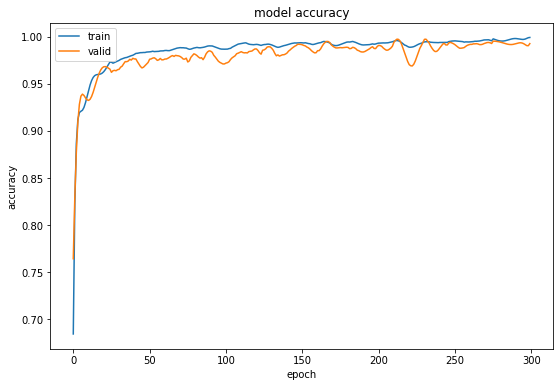

In [ ]:
from scipy.signal import savgol_filter
from numpy import log as ln
from numpy import log10 as log
history = model.history
acc = savgol_filter(history.history['acc'],51,10)
val_acc = savgol_filter(history.history['val_acc'],51,10)
plt.rcParams["figure.figsize"] = (9,6)
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

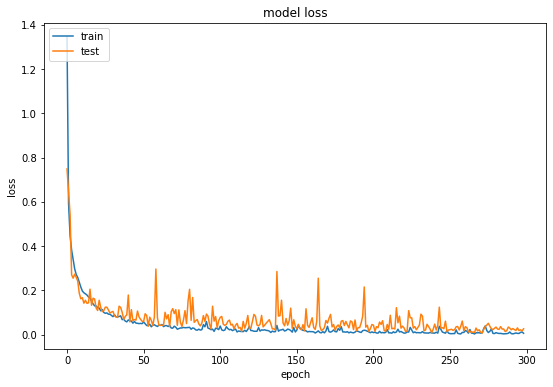

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'][0:299])
plt.plot(history.history['val_loss'][0:299])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
mtest = load_model("trained_model/size_100_18-02/weights.100.150-1.00.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
mtest.evaluate(x_train[0:1000],y_train[0:1000])

1000/1000 [==============================] - 0s 435us/sample - loss: 0.0047 - acc: 0.9990


[0.004738807330722921, 0.999]

In [ ]:

%matplotlib inline
import os
import random
import numpy as np
import json
import matplotlib.pyplot
import pickle
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE

In [ ]:

import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

In [ ]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

shape of x:  (1, 224, 224, 3)
data type:  float32
predicted hip with probability 0.173
predicted ping-pong_ball with probability 0.087
predicted joystick with probability 0.086
predicted croquet_ball with probability 0.057
predicted maraca with probability 0.052


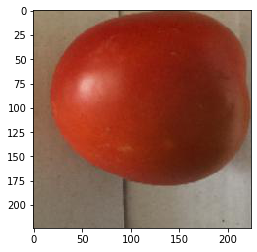

In [ ]:
img, x = load_image("tsne/loai1/IMG_scale87.jpg")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)
predictions = model.predict(x)

# print out the 
for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))

In [ ]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

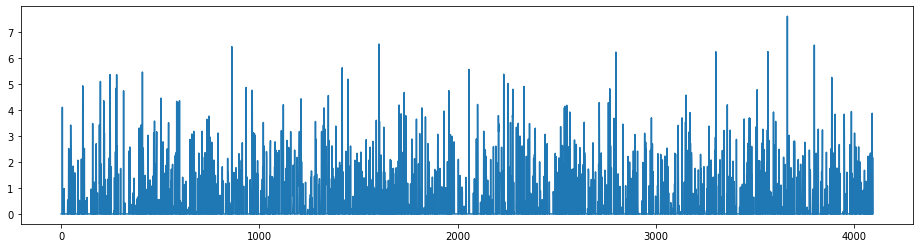

In [ ]:
img, x = load_image("tsne/loai1/IMG_scale87.jpg")
feat = feat_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feat[0])

In [ ]:

images_path = 'tsne'
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 55 images to analyze


In [ ]:
import time
tic = time.clock()


features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.clock()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(images))

analyzing image 0 / 55. Time: 0.0002 seconds.
finished extracting features for 55 images


In [ ]:
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=50)
pca.fit(features)
pca_features = pca.transform(features)

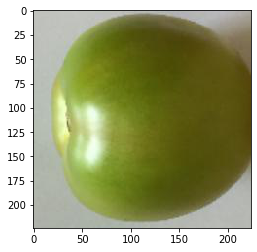

In [ ]:
import random

# grab a random query image
query_image_idx = int(len(images) * random.random())

# let's display the image
img = image.load_img(images[query_image_idx])
plt.imshow(img)

In [ ]:
from scipy.spatial import distance

similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]

In [ ]:
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]

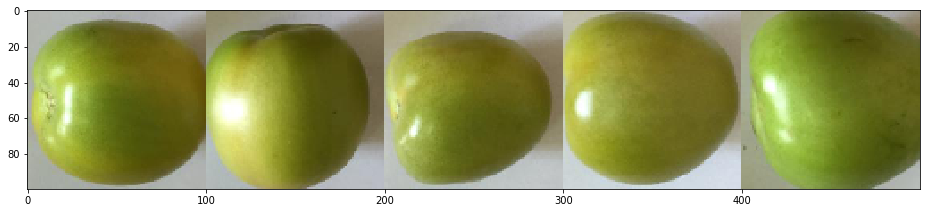

In [ ]:
thumbs = []
for idx in idx_closest:
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

In [ ]:

def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

Text(0.5, 1.0, 'result images')

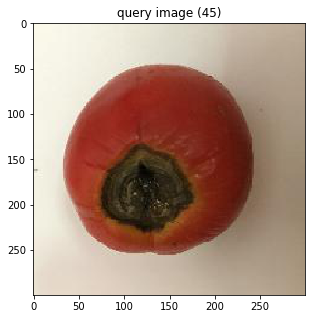

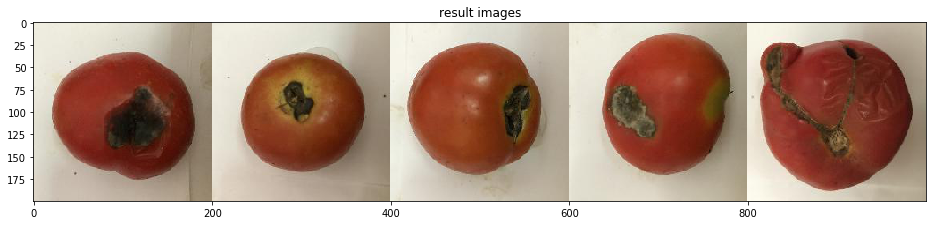

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

Text(0.5, 1.0, 'result images')

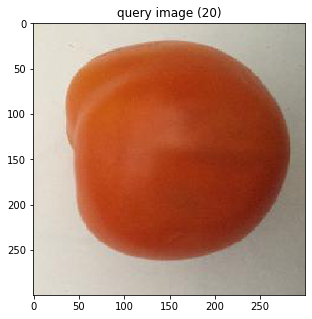

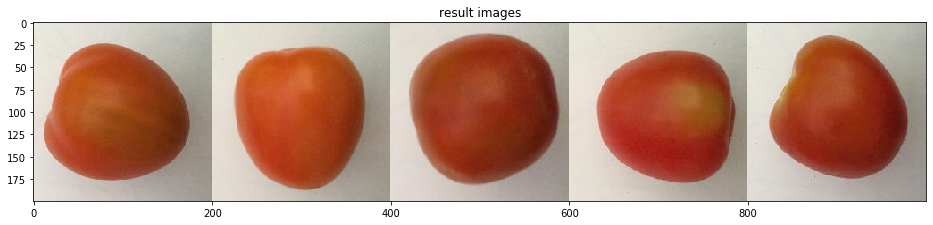

In [ ]:
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

In [ ]:
import pickle

pickle.dump([images, pca_features, pca], open('features_tomato.p', 'wb'))

In [ ]:
images, pca_features, pca = pickle.load(open('features_tomato.p', 'rb'))

for img, f in list(zip(images, pca_features))[0:5]:
    print("image: %s, features: %0.2f,%0.2f,%0.2f,%0.2f... "%(img, f[0], f[1], f[2], f[3]))

image: tsne/loai3/IMG_scale76.jpg, features: 16.46,13.55,-14.76,2.34... 
image: tsne/loai3/IMG_scale72.jpg, features: 12.41,5.58,-17.54,-0.79... 
image: tsne/loai3/IMG_scale71.jpg, features: 17.19,13.53,-26.76,1.98... 
image: tsne/loai3/IMG_scale75.jpg, features: 13.01,16.37,-18.79,-7.08... 
image: tsne/loai3/IMG_scale73.jpg, features: 6.84,17.16,-26.78,-9.79... 


In [ ]:
num_images_to_plot = 55

if len(images) > num_images_to_plot:
    sort_order = sorted(random.sample(range(len(images)), num_images_to_plot))
    images = [images[i] for i in sort_order]
    pca_features = [pca_features[i] for i in sort_order]

In [ ]:

X = np.array(pca_features)
tsne = TSNE(n_components=2, learning_rate=150, perplexity=30, angle=0.2, verbose=2).fit_transform(X)

[t-SNE] Computing 54 nearest neighbors...
[t-SNE] Indexed 55 samples in 0.000s...
[t-SNE] Computed neighbors for 55 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 55 / 55
[t-SNE] Mean sigma: 17.300094
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 53.6211166, gradient norm = 0.5790135 (50 iterations in 0.019s)
[t-SNE] Iteration 100: error = 50.8614197, gradient norm = 0.5376705 (50 iterations in 0.015s)
[t-SNE] Iteration 150: error = 54.2088852, gradient norm = 0.5612161 (50 iterations in 0.015s)
[t-SNE] Iteration 200: error = 53.7714767, gradient norm = 0.5465050 (50 iterations in 0.015s)
[t-SNE] Iteration 250: error = 50.1029892, gradient norm = 0.5673741 (50 iterations in 0.015s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.102989
[t-SNE] Iteration 300: error = 0.9312882, gradient norm = 0.0032580 (50 iterations in 0.014s)
[t-SNE] Iteration 350: error = 0.6821914, gradient norm = 0.0038423 (50 

In [ ]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

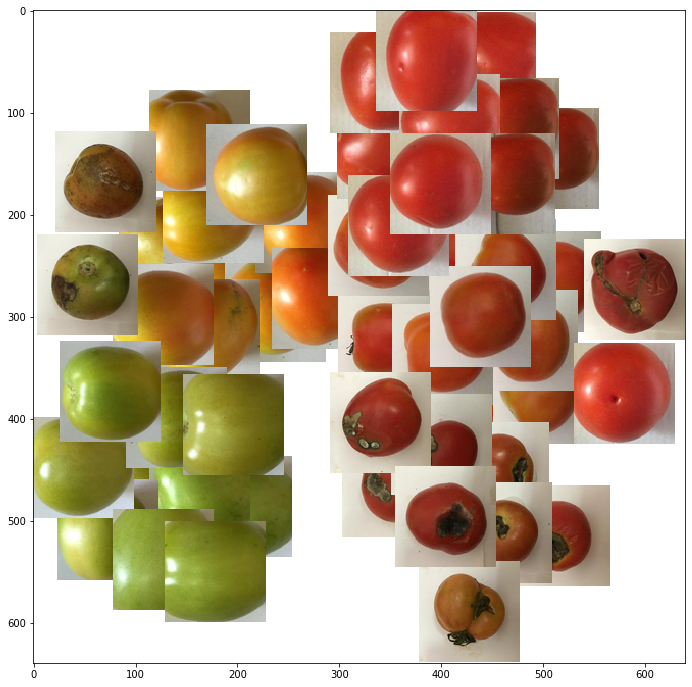

In [ ]:
width = 640
height = 640
max_dim = 100

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

In [ ]:
full_image.save("tSNE.png")